# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
198,4,109,64,44,99,34.8,0.905,26,1
249,1,111,86,19,0,30.1,0.143,23,0
515,3,163,70,18,105,31.6,0.268,28,1
243,6,119,50,22,176,27.1,1.318,33,1
696,3,169,74,19,125,29.9,0.268,31,1


In [5]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [38]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [39]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [40]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3004 - loss: 0.8566 - val_accuracy: 0.3333 - val_loss: 0.8310
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 0.8105 - val_accuracy: 0.3490 - val_loss: 0.8151
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3556 - loss: 0.7979 - val_accuracy: 0.3490 - val_loss: 0.8004
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3556 - loss: 0.7842 - val_accuracy: 0.3490 - val_loss: 0.7869
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3772 - loss: 0.7738 - val_accuracy: 0.3594 - val_loss: 0.7744
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3956 - loss: 0.7590 - val_accuracy: 0.3802 - val_loss: 0.7628
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4002 - loss: 0.7559 - val_accuracy: 0.3854 - val_loss: 0.7521
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4574 - loss: 0.7353 - val_accuracy: 0.4062 - v

In [41]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


In [42]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]


array([[0.4684058 ],
       [0.63890386],
       [0.26683128],
       [0.21891187],
       [0.25055093],
       [0.49234203],
       [0.04852501],
       [0.20249368],
       [0.8860893 ],
       [0.20636015]], dtype=float32)

In [43]:
y_pred_prob_nn_1[:10]

array([[0.4684058 ],
       [0.63890386],
       [0.26683128],
       [0.21891187],
       [0.25055093],
       [0.49234203],
       [0.04852501],
       [0.20249368],
       [0.8860893 ],
       [0.20636015]], dtype=float32)

Create the plot_roc function

In [44]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.801


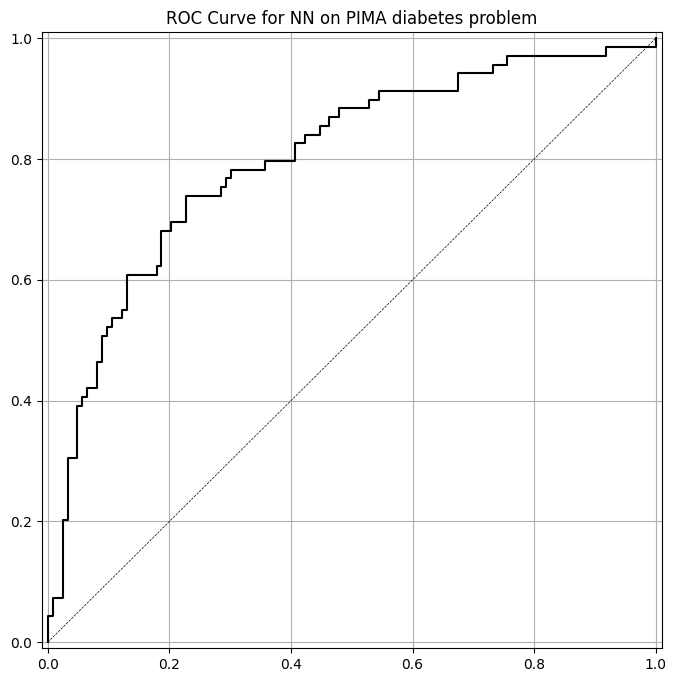

In [46]:
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))


plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [47]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

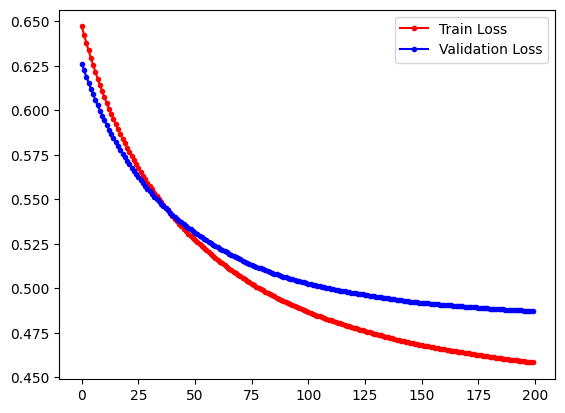

In [25]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

this shows the relation between train and validation starts with a good close line to each other but after 75 the train loss drop much compared to validation making the gap huge between them.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [58]:

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
model1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.3630 - val_accuracy: 0.7865 - val_loss: 0.5185
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4082 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.4153 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 0.4007 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8003 - loss: 0.4131 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4071 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.3993 - val_accuracy: 0.7865 - val_loss: 0.5186
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.3884 - val_accuracy: 0.7865 - val_

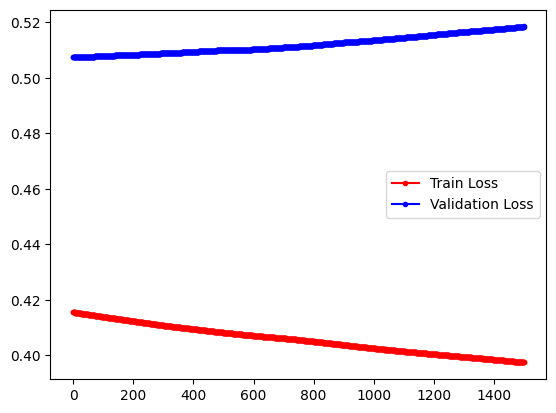

In [56]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion

#type your answer here